In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import geopandas
from bs4 import BeautifulSoup
from difflib import SequenceMatcher

In [13]:
data = pd.read_csv("data/Meteorite_Landings.csv")
data_header = data.columns
data = data.dropna(axis = 1, how='all')
groups = data.groupby(['recclass'])

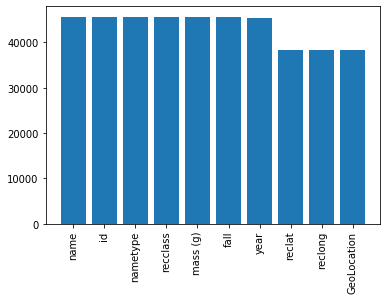

In [14]:
dc = list(data.columns)

count = data.count()

values = []
for c in count:
    values.append(c)

y_pos = np.arange(len(dc))

plt.bar(y_pos, values)
plt.xticks(y_pos, dc, rotation=90)

plt.show() 

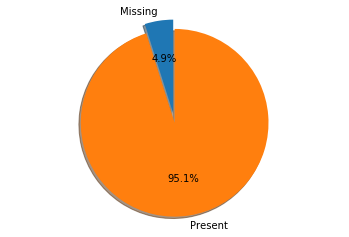

In [15]:
perc_m = (100*((max(values)*len(dc)) - sum(values)))/(max(values)*len(dc))
perc_e = 100-perc_m


labels = 'Missing', 'Present'
sizes = [perc_m, perc_e]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
data = data.to_numpy()

for c in data:
    if np.isnan(c[4]):
        if c[3] == 'Unknown':
            c[4] = 0.0
        else:
            data_recclass = c[3]
            c[4] = groups.get_group(data_recclass).mean()[1]

In [18]:
headers = requests.utils.default_headers()
headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

url = 'https://www.lpi.usra.edu/meteor/metbull.php?code=' + str(c[1])
page = requests.get(url, headers)
    
soup = BeautifulSoup(page.text, 'html.parser')

def get_country_name(country_name_list):
    
    datas = []
    table = soup.find('table', attrs={'id':'maintable'})
    rows = table.find_all('tr')
    
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        datas.append([ele for ele in cols if ele]) # Get rid of empty values

    string_formatted = datas[1][1]
    country_name = string_formatted.split("\n")[-2:-1]
    country_name_formated = country_name[0].split(": ")[1]
    cn = country_name_formated.rstrip()
    
    best = 0.0
    cntry_name = ''

    for s in country_name_list:
        ratio = SequenceMatcher(None, cn, s).ratio()
        
        if ratio > best:
            best = ratio
            cntry_name = cn
    
    return cntry_name
        
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['centroid_column'] = world.centroid
country_name_list = world.name.tolist()

for c in data:
    
    if np.isnan(c[7]):
        
        country_name_founded = get_country_name(country_name_list)
        country = world[world.name == country_name_founded].centroid_column 
        coords = str(country).split('\n')[0].split('POINT ')[1]
        geolocation = coords.replace(" ", ",")
        coords_separated = coords.split(" ")
        lat = coords_separated[0].replace("(", "")
        long = coords_separated[1].replace(")", "")
        c[9] = geolocation
        c[8] = long
        c[7] = lat
            


In [19]:
data_resultado = pd.DataFrame(data = data, columns = data_header)
data_resultado

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.775,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.1833,10.2333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.2167,-113,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.8833,-99.9,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.1667,-64.95,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172,Found,01/01/1990 12:00:00 AM,29.037,17.0185,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46,Found,01/01/1999 12:00:00 AM,13.7833,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25,17.6667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167,Found,01/01/2003 12:00:00 AM,49.7892,41.5046,"(49.78917, 41.5046)"


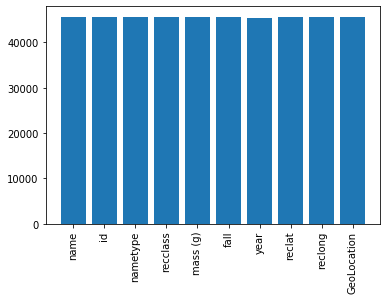

In [20]:
dc = list(data_resultado.columns)

count = data_resultado.count()

values = []
for c in count:
    values.append(c)

y_pos = np.arange(len(dc))

plt.bar(y_pos, values)
plt.xticks(y_pos, dc, rotation=90)

plt.show() 

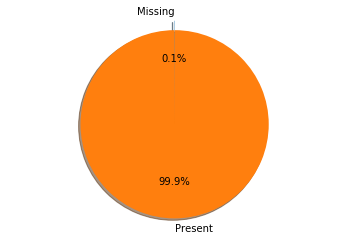

In [21]:
perc_m = (100*((max(values)*len(dc)) - sum(values)))/(max(values)*len(dc))
perc_e = 100-perc_m


labels = 'Missing', 'Present'
sizes = [perc_m, perc_e]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()